In [1]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [5]:
class Music(object):
    def __init__(self):
        self.scale = [
            'C','C#','D','D#',
            'E','F','F#','G',
            'G#','A','A#','B'
        ]
        # ----------------------------
        # Sets of semitone steps for 
        #
        ## scales 
        ### pentatonic
        self.pentatonic_major = [0,2,4,7,9]
        self.pentatonic_minor = [0,3,5,7,10]
        
        ### blues
        #### 1, 2,♭3, 3, 5, 6
        self.blues_major = [0,2,3,4,7,9]
        #### 1, ♭3, 4, ♭5, 5, ♭7
        self.blues_minor = [0,3,5,6,7,10]
        
        ### diatonic
        self.diatonic_major = [0,2,4,5,7,9,11]
        self.diatonic_ionian = self.diatonic_major
        #### flat 7th
        self.diatonic_mixolydian = [0,2,4,5,7,9,10]
        #### flat 7th, flat 3rd
        self.diatonic_dorian = [0,2,3,5,7,9,10]
        #### flat 7th, flat 3rd, flat 6th
        self.diatonic_aeolian = [0,2,3,5,7,8,10]
        self.diatonic_minor = self.diatonic_aeolian
        self.natural_minor = self.diatonic_aeolian
        #### flat 7th, flat 3rd, flat 6th, flat 2nd
        self.diatonic_phrygian = [0,1,3,5,7,8,10]
        #### flat 7th, flat 3rd, flat 6th, flat 2nd, flat 5th
        self.diatonic_locrian = [0,1,3,5,6,8,10]
        #### sharp 4th
        self.diatonic_lydian = [0,2,4,6,7,9,11]
        ### -------------------------------------
        
        ### harmonic minor
        #### aeolian sharp 7th
        #### flat 3rd, flat 6th
        self.harmonic_minor = [0,2,3,5,7,8,11]
        self.phrygian_dominant = [0,1,4,5,7,8,10]
        
        ## chords
        self.triad_major = [0,4,7]
        self.triad_minor = [0,3,7]
        self.triad_diminished = [0,3,6]
        self.triad_augmented = [0,4,8]
        ### add7
        self.seventh_dominant = [0,4,7,10]
        self.seventh_major = [0,4,7,11]
        ### hendrix: dominant 7♯9
        self.seventh_sharp_ninth_dominant = [0,4,7,10,15]
        ###     r, 3, (5), ♭7, (9), ♯11, (13)
        self.lydian_major = [0,4,7,10,18]#[0,4,7,10,14,18,21]
        
    def get_root_index(self,root='C'):
        # returns the index of the root note
        ind=0
        for i,e in enumerate(self.scale):
            if root==e: ind=i
        return ind
    
    def wraparound(self,i):
        # rockaround the chromatic scale
        if i >= len(self.scale):
            i = i % len(self.scale)
        return i

    # -----------------------------------------
    def return_notes(self,
                     root='C',
                     scale_type='triad',
                     kind='major'):
        '''
        root = Root note. Default: C
        scale_type = return notes for chords or scales. Default: triad chords
        kind = major, minor, etc.. Default: major
        
        Returns a list of notes. 
        '''
        ind = self.get_root_index(root)
        # semitone steps in integer
        steps = getattr(self,scale_type+'_'+kind)
        notes=[]
        for x in steps:
            notes.append(self.scale[self.wraparound(ind+x)])
        return notes

class Guitar(object):
    def __init__(self,Music):
        self.tuning=['E','A','D','G','B','E']
        self.steps=21
        self.scale_len = 21 #648mm
        # init the figure
        self.f, self.ax = plt.subplots(1,1,figsize=(18,2))
        
        # fretboard is a dataframe of each note
        # string int | note | fret int  
        
        """
        The (really) historical technique is called the rule of 18, 
        and it involves successively dividing the scale 
        length minus the offset to the previous fret by 18 (17.817).
        Dn = [(L – Dn-1) ÷ 17.817] + Dn-1
        """
        
        self.fretboard= pd.DataFrame()
        for string_int,string in enumerate(self.tuning):
            notes,frets=[],[]
            root_ind = Music.get_root_index(string)
            for i,semitone in enumerate(list(range(0,self.steps+1))):
                notes.append(Music.scale[Music.wraparound(root_ind+semitone)])
                if i ==0 : frets.append(0)
                else: 
                    frets.append(((self.scale_len-frets[i-1])/17.817)+frets[i-1])
            
            tmp = pd.DataFrame(list(zip(notes, frets)),columns =['notes', 'fret'])
            tmp['string']=string_int
            self.fretboard = pd.concat([self.fretboard,tmp])

    def draw_neck(self):
        """
        draw the basic neck
        """
        # draw strings
        for y in range(0,len(self.tuning)):
            self.ax.hlines(xmin=0,xmax=self.steps,y=y,color='#6E6E6E',linewidth=0.66)
        
        # draw frets
        tix=[]
        frets = sorted(list(set(self.fretboard['fret'])))
        ymin,ymax=0-0.25,len(self.tuning)
        for i,x in enumerate(range(0,self.steps+1)):
            fret_x = frets[i]
            self.ax.vlines(ymin=ymin,ymax=ymax-0.7,x=fret_x,color='black')
            if x>=3 or x>=15:
                # draw dots
                x_mid = (frets[i]+frets[i-1])/2
                dot_sz=50
                if x % 2 == 1 and (x<11 or (x > 13 and x<20)):
                    self.ax.scatter(x=x_mid,y=(ymax-0.7)/2,color='black',s=dot_sz)
                    tix.append(x_mid)
                if x==12:
                    tix.append(x_mid)
                    self.ax.scatter(x=x_mid,y=(ymax-0.7)/4,color='black',s=dot_sz)
                    self.ax.scatter(x=x_mid,y=(ymax-0.7)-((ymax-0.7)/4),color='black',s=dot_sz)
            
        self.ax.set_facecolor('#dec49d')
        self.ax.set_xlim(0-0.2,max(frets))
        self.ax.set_ylim(ymin,ymax)
        self.ax.set_xticks(tix)
        self.ax.set_xticklabels(['III','V','VII','IX','XII','XV','XVII','XIX'],fontsize=13,weight='bold')
        self.ax.set_yticks([x for x in range(0,len(self.tuning))])
        self.ax.set_yticklabels(self.tuning,fontsize=13,weight='bold')

        sns.despine(ax=self.ax)
        
        self.f.tight_layout()
    
    def fret_notes(self,notes,color_notes=False):
        """
        given a set of notes, return a list
        of lists containg the fret positions
        """
        self.draw_neck()
        fret = self.fretboard.loc[self.fretboard['notes'].isin(notes)]
        fret = self.fretboard.loc[self.fretboard['notes'].isin(notes)]
        pal = ['mediumspringgreen','gainsboro']
        if color_notes != False: pal = color_notes
        if color_notes == True: pal = 'Greens_r'
        if color_notes == False:
            _pal=[0]
            for i in range(1,len(notes)): _pal.append(1)
        else:
            _pal=[]
            for i in range(0,len(notes)): _pal.append(i)
        fret['color']=fret['notes'].replace(dict(zip(notes,_pal)))            
            
        # offset the notes #########################################
        #fret['fret']=[x-0.75 if x else 0-0.1 for x in fret['fret']]
        offset={}
        fret_pos = sorted(set(fret['fret']))
        buff = 0.125
        for i,x in enumerate(fret_pos):
            if x==0: offset[x]=x-buff+0.025
            else: 
                offset[x]= ((fret_pos[i-1]+x)/2) - buff
        fret['fret_pos']=fret['fret'].map(offset)
        ############################################################       
        dot_sz=144
        sns.scatterplot(
            x='fret_pos',
            y='string',
            hue='color',
            palette=pal,
            ax=self.ax,
            s=dot_sz,
            edgecolor='black',
            data=fret,
            legend=None,
            alpha=1.,
            zorder=10,
            linewidth=1.3,
        )
        
        self.ax.set_xlabel('')
        self.ax.set_ylabel('')
        self.ax.set_ylim(0-0.4,len(self.tuning)-0.5)
        #self.ax.legend(ncol=len(notes))
        self.f.tight_layout()
    
    def smash_guitar(self):
        "clears the plot"
        self.f.clf()

In [3]:
Music().return_notes('A','seventh_sharp_ninth','dominant')
# C, E, G, B♭, (D), F♯, (A)

['G', 'B', 'D', 'F', 'A#']

['A', 'B', 'C', 'D', 'E', 'F', 'G#']


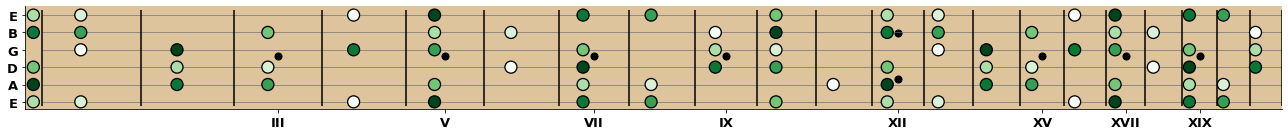

In [8]:
M = Music()
s = M.return_notes('A','harmonic','minor')
print(s)
G = Guitar(M)
G.fret_notes(s,color_notes=True)
#G = Guitar(M)
#G.fret_notes(['D'],color_notes=True)

G.f.savefig("a_harmonic_minor.svg")

['A', 'C#', 'E', 'G']


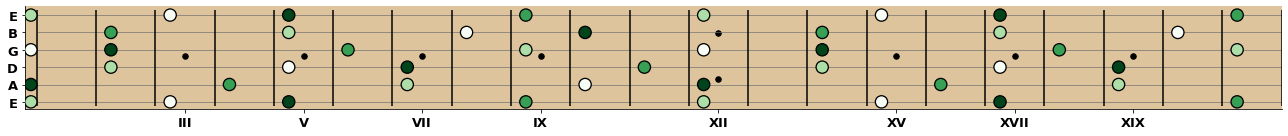

In [6]:
M = Music()
s = M.return_notes('A','seventh','dominant')
print(s)
G = Guitar(M)
G.fret_notes(s,color_notes=True)

['C#', 'E', 'G']


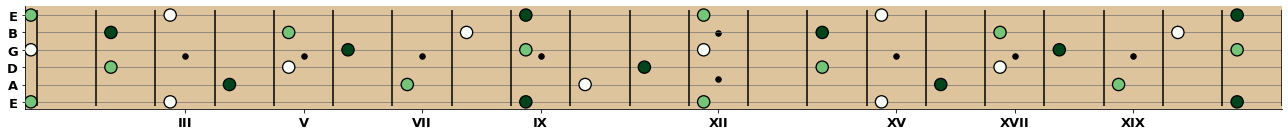

In [8]:
M = Music()
s = M.return_notes('C#','triad','diminished')
print(s)
G = Guitar(M)
G.fret_notes(s,color_notes=True)